In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# Read the CSV file into a DataFrame
df = pd.read_csv('aipsych_moralfoundations.csv')

# Display the first few rows to verify import
print(df.head())

     framework      label                                         definition
0  maladaptive  Excitable  Moody and hard to please, with intense but sho...
1  maladaptive  Skeptical  Cynical, distrustful, and quick to doubt other...
2  maladaptive   Cautious  Reluctant to take risks or initiative due to f...
3  maladaptive  Reserved   Aloof, detached, uncommunicative, and disinter...
4  maladaptive  Leisurely  Independent, resistant to feedback, and quietl...


In [17]:
# Load model on CPU explicitly
model = SentenceTransformer('all-MiniLM-L6-v2', device='cpu')

# Generate embeddings
embeddings = model.encode(df['definition'].tolist(), batch_size=8, show_progress_bar=True)

# Add to DataFrame
embed_cols = pd.DataFrame(embeddings, index=df.index, columns=[f"emb_dim_{i}" for i in range(embeddings.shape[1])])
df = pd.concat([df, embed_cols], axis=1)

print(df.head())


/opt/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

     framework      label                                         definition  \
0  maladaptive  Excitable  Moody and hard to please, with intense but sho...   
1  maladaptive  Skeptical  Cynical, distrustful, and quick to doubt other...   
2  maladaptive   Cautious  Reluctant to take risks or initiative due to f...   
3  maladaptive  Reserved   Aloof, detached, uncommunicative, and disinter...   
4  maladaptive  Leisurely  Independent, resistant to feedback, and quietl...   

   emb_dim_0  emb_dim_1  emb_dim_2  emb_dim_3  emb_dim_4  emb_dim_5  \
0   0.038430  -0.021501  -0.002848   0.083130  -0.012589   0.043938   
1   0.073827  -0.015647  -0.013000   0.030636   0.069399   0.017171   
2   0.116710  -0.023252  -0.057359   0.013859   0.023564   0.058440   
3   0.053991  -0.023112  -0.001848   0.081539   0.005580  -0.041573   
4   0.013733  -0.006178  -0.049234   0.061141   0.012856   0.020703   

   emb_dim_6  ...  emb_dim_374  emb_dim_375  emb_dim_376  emb_dim_377  \
0   0.077049  ...  

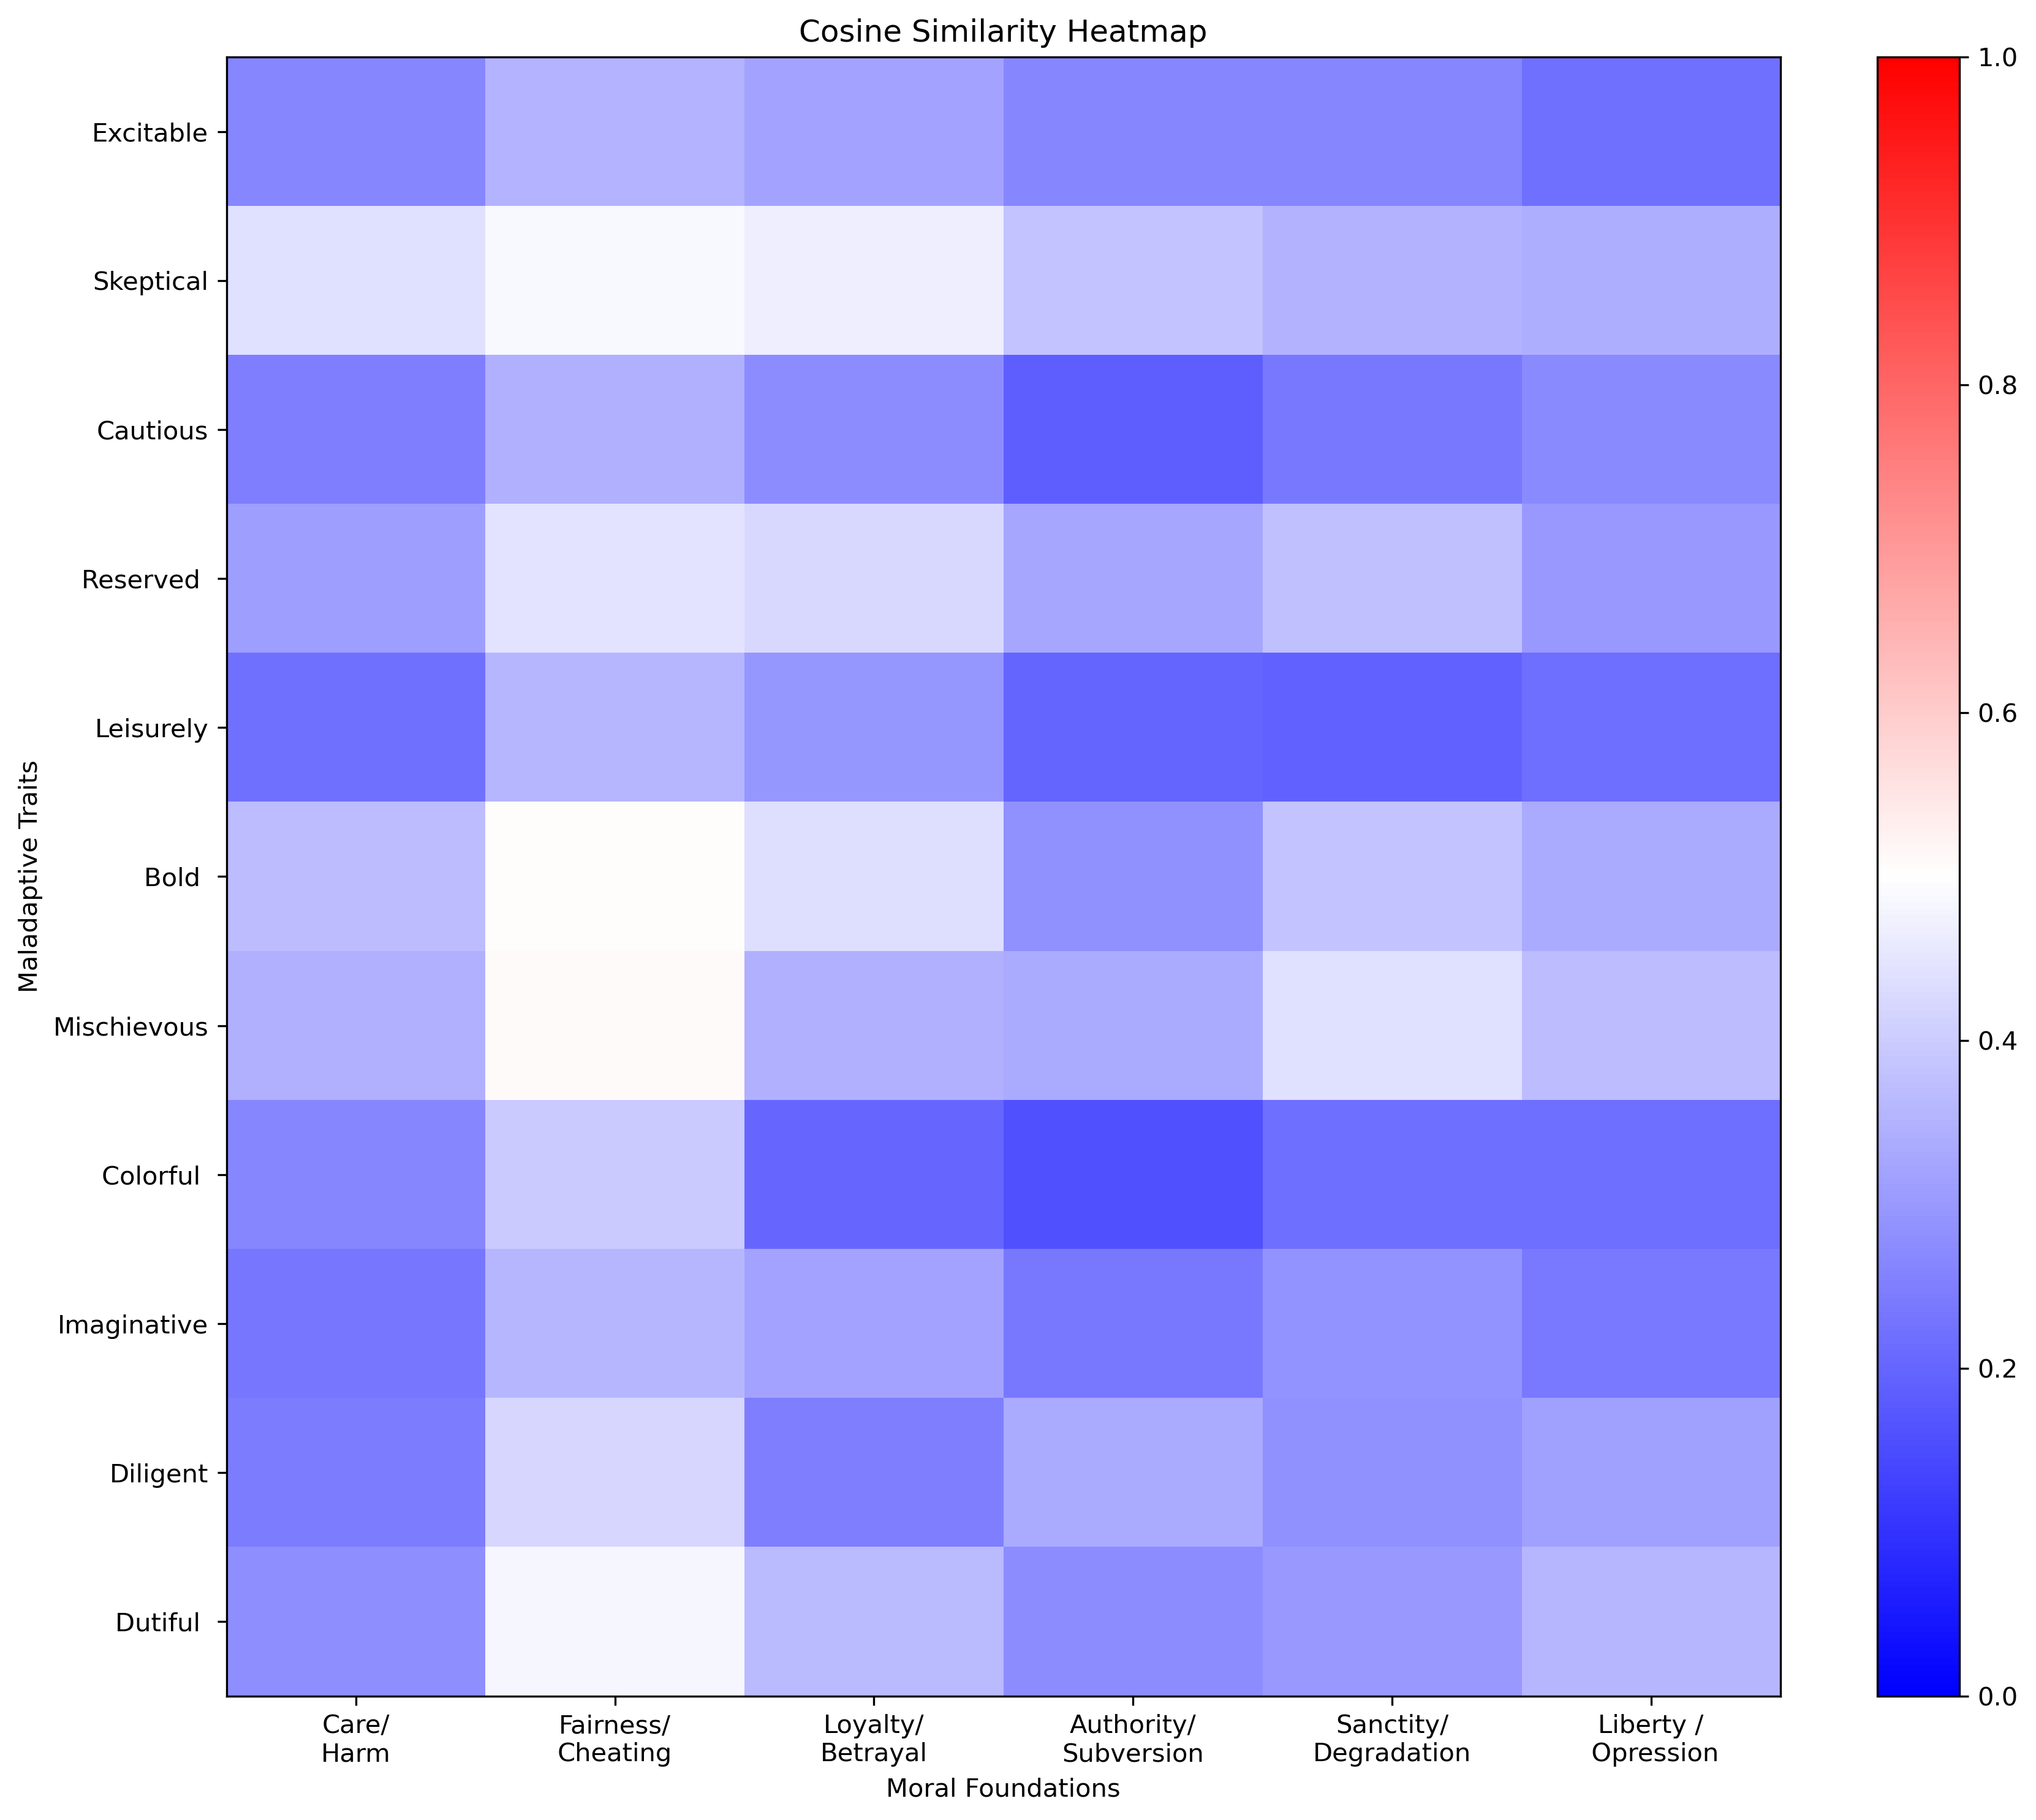

In [9]:

# Filter rows based on 'framework'
maladaptive = df[df['framework'] == 'maladaptive']
moral = df[df['framework'] == 'moral']

# Extract labels
row_labels = maladaptive['label'].values

# Insert line breaks at "/" in the moral labels
col_labels = [label.replace('/', '/\n') for label in moral['label'].values]

# Identify embedding columns (assumes they start with 'emb_dim_')
embed_cols = [col for col in df.columns if col.startswith('emb_dim_')]

# Get embeddings for each group
maladaptive_embeddings = maladaptive[embed_cols].values
moral_embeddings = moral[embed_cols].values

# Compute cosine similarity: rows (maladaptive) vs. columns (moral)
cos_sim = cosine_similarity(maladaptive_embeddings, moral_embeddings)

# Create a high resolution figure
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
cax = ax.imshow(cos_sim, aspect='auto', cmap='bwr', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar(cax)

# Set tick labels
ax.set_xticks(np.arange(len(col_labels)))
ax.set_xticklabels(col_labels, rotation=0)  # horizontal x-axis labels
ax.set_yticks(np.arange(len(row_labels)))
ax.set_yticklabels(row_labels)

ax.set_xlabel('Moral Foundations')
ax.set_ylabel('Maladaptive Traits')
ax.set_title('Cosine Similarity Heatmap')

plt.tight_layout()

# Save the figure as a JPEG image
plt.savefig('darktraits_heatmap.jpeg', format='jpeg', dpi=300)

plt.show()


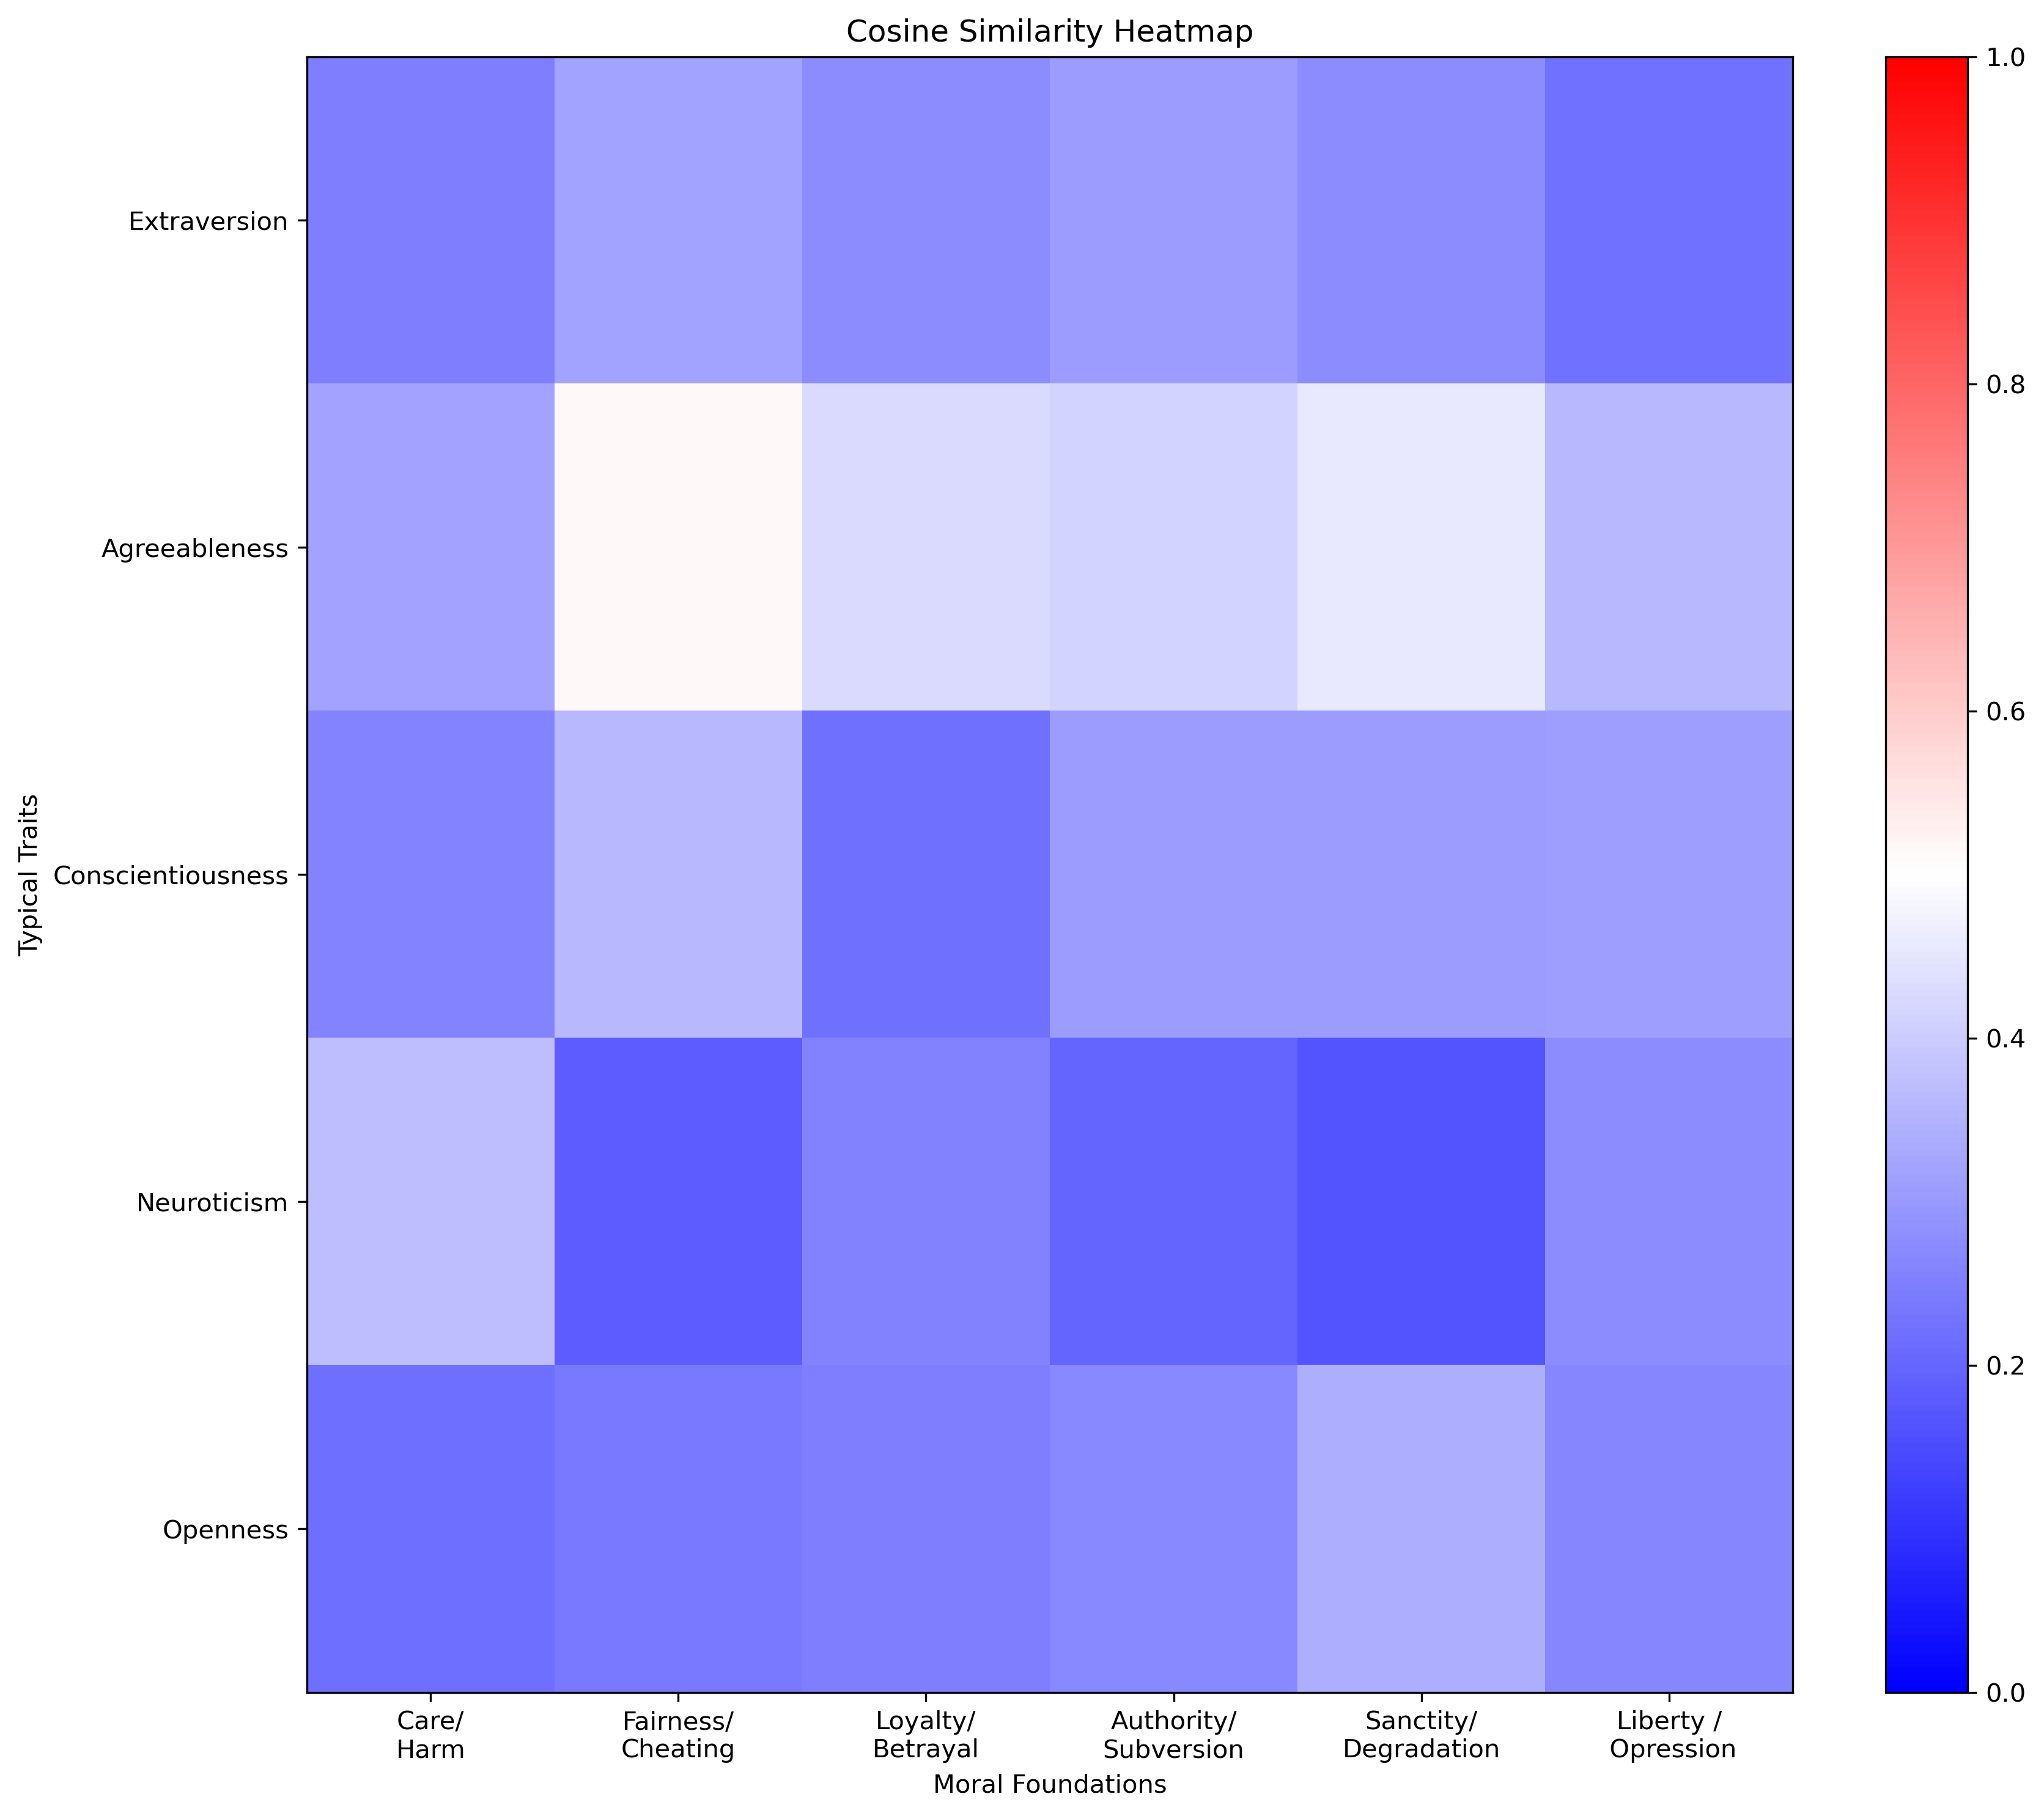

In [11]:
# Filter rows based on 'framework'
typical = df[df['framework'] == 'typical']
moral = df[df['framework'] == 'moral']

# Extract labels
row_labels = typical['label'].values
col_labels = [label.replace('/', '/\n') for label in moral['label'].values]

# Identify embedding columns (assumes they start with 'emb_dim_')
embed_cols = [col for col in df.columns if col.startswith('emb_dim_')]

# Get embeddings for each group
typical_embeddings = typical[embed_cols].values
moral_embeddings = moral[embed_cols].values

# Compute cosine similarity: rows (typical) vs. columns (moral)
cos_sim = cosine_similarity(typical_embeddings, moral_embeddings)

# Create a high resolution figure
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
cax = ax.imshow(cos_sim, aspect='auto', cmap='bwr', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar(cax)

# Set tick labels using the 'label' values
ax.set_xticks(np.arange(len(col_labels)))
ax.set_xticklabels(col_labels, rotation=0)  # horizontal x-axis labels
ax.set_yticks(np.arange(len(row_labels)))
ax.set_yticklabels(row_labels)

ax.set_xlabel('Moral Foundations')
ax.set_ylabel('Typical Traits')
ax.set_title('Cosine Similarity Heatmap')

plt.tight_layout()
plt.savefig('typical_traits_heatmap.jpg', format='jpg', dpi=300)
plt.show()


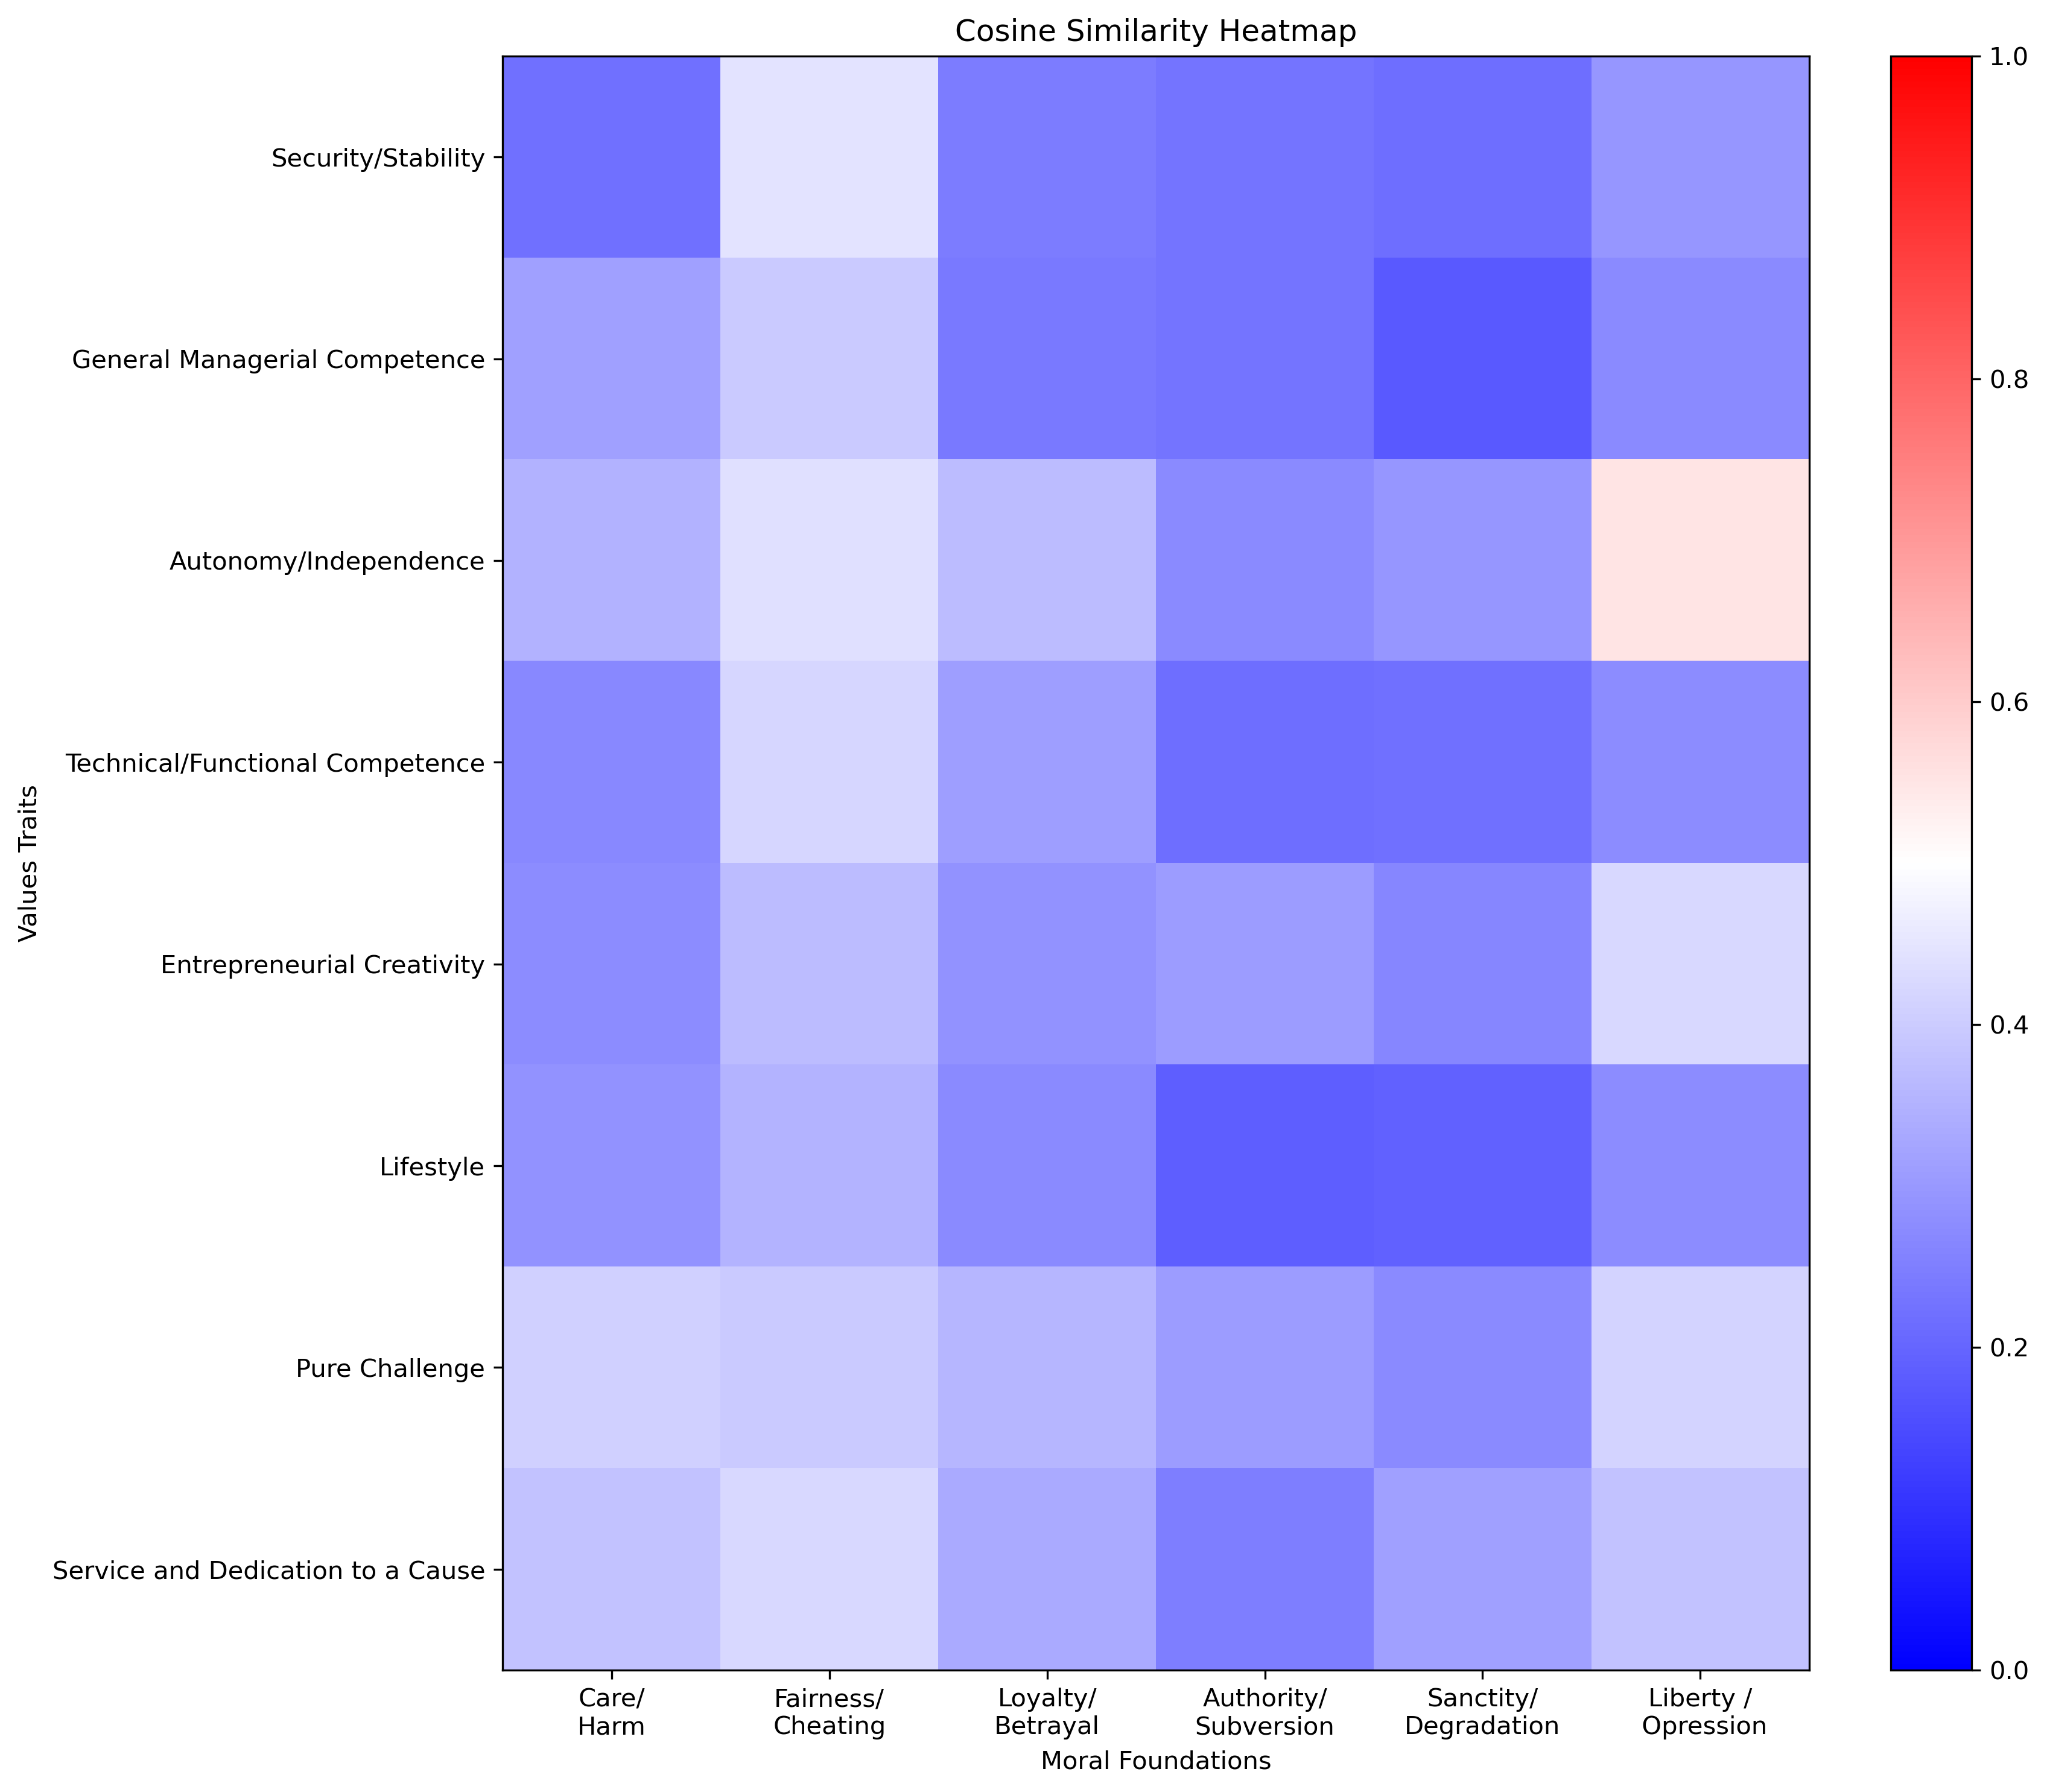

In [13]:
# Filter rows based on 'framework'
values = df[df['framework'] == 'values']
moral = df[df['framework'] == 'moral']

# Extract labels
row_labels = values['label'].values
col_labels = [label.replace('/', '/\n') for label in moral['label'].values]

# Identify embedding columns (assumes they start with 'emb_dim_')
embed_cols = [col for col in df.columns if col.startswith('emb_dim_')]

# Get embeddings for each group
values_embeddings = values[embed_cols].values
moral_embeddings = moral[embed_cols].values

# Compute cosine similarity: rows (values) vs. columns (moral)
cos_sim = cosine_similarity(values_embeddings, moral_embeddings)

# Create a high resolution figure
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
cax = ax.imshow(cos_sim, aspect='auto', cmap='bwr', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar(cax)

# Set tick labels using the 'label' values
ax.set_xticks(np.arange(len(col_labels)))
ax.set_xticklabels(col_labels, rotation=0)  # horizontal x-axis labels
ax.set_yticks(np.arange(len(row_labels)))
ax.set_yticklabels(row_labels)

ax.set_xlabel('Moral Foundations')
ax.set_ylabel('Values Traits')
ax.set_title('Cosine Similarity Heatmap')

plt.tight_layout()
plt.savefig('values_heatmap.jpg', format='jpg', dpi=300)
plt.show()


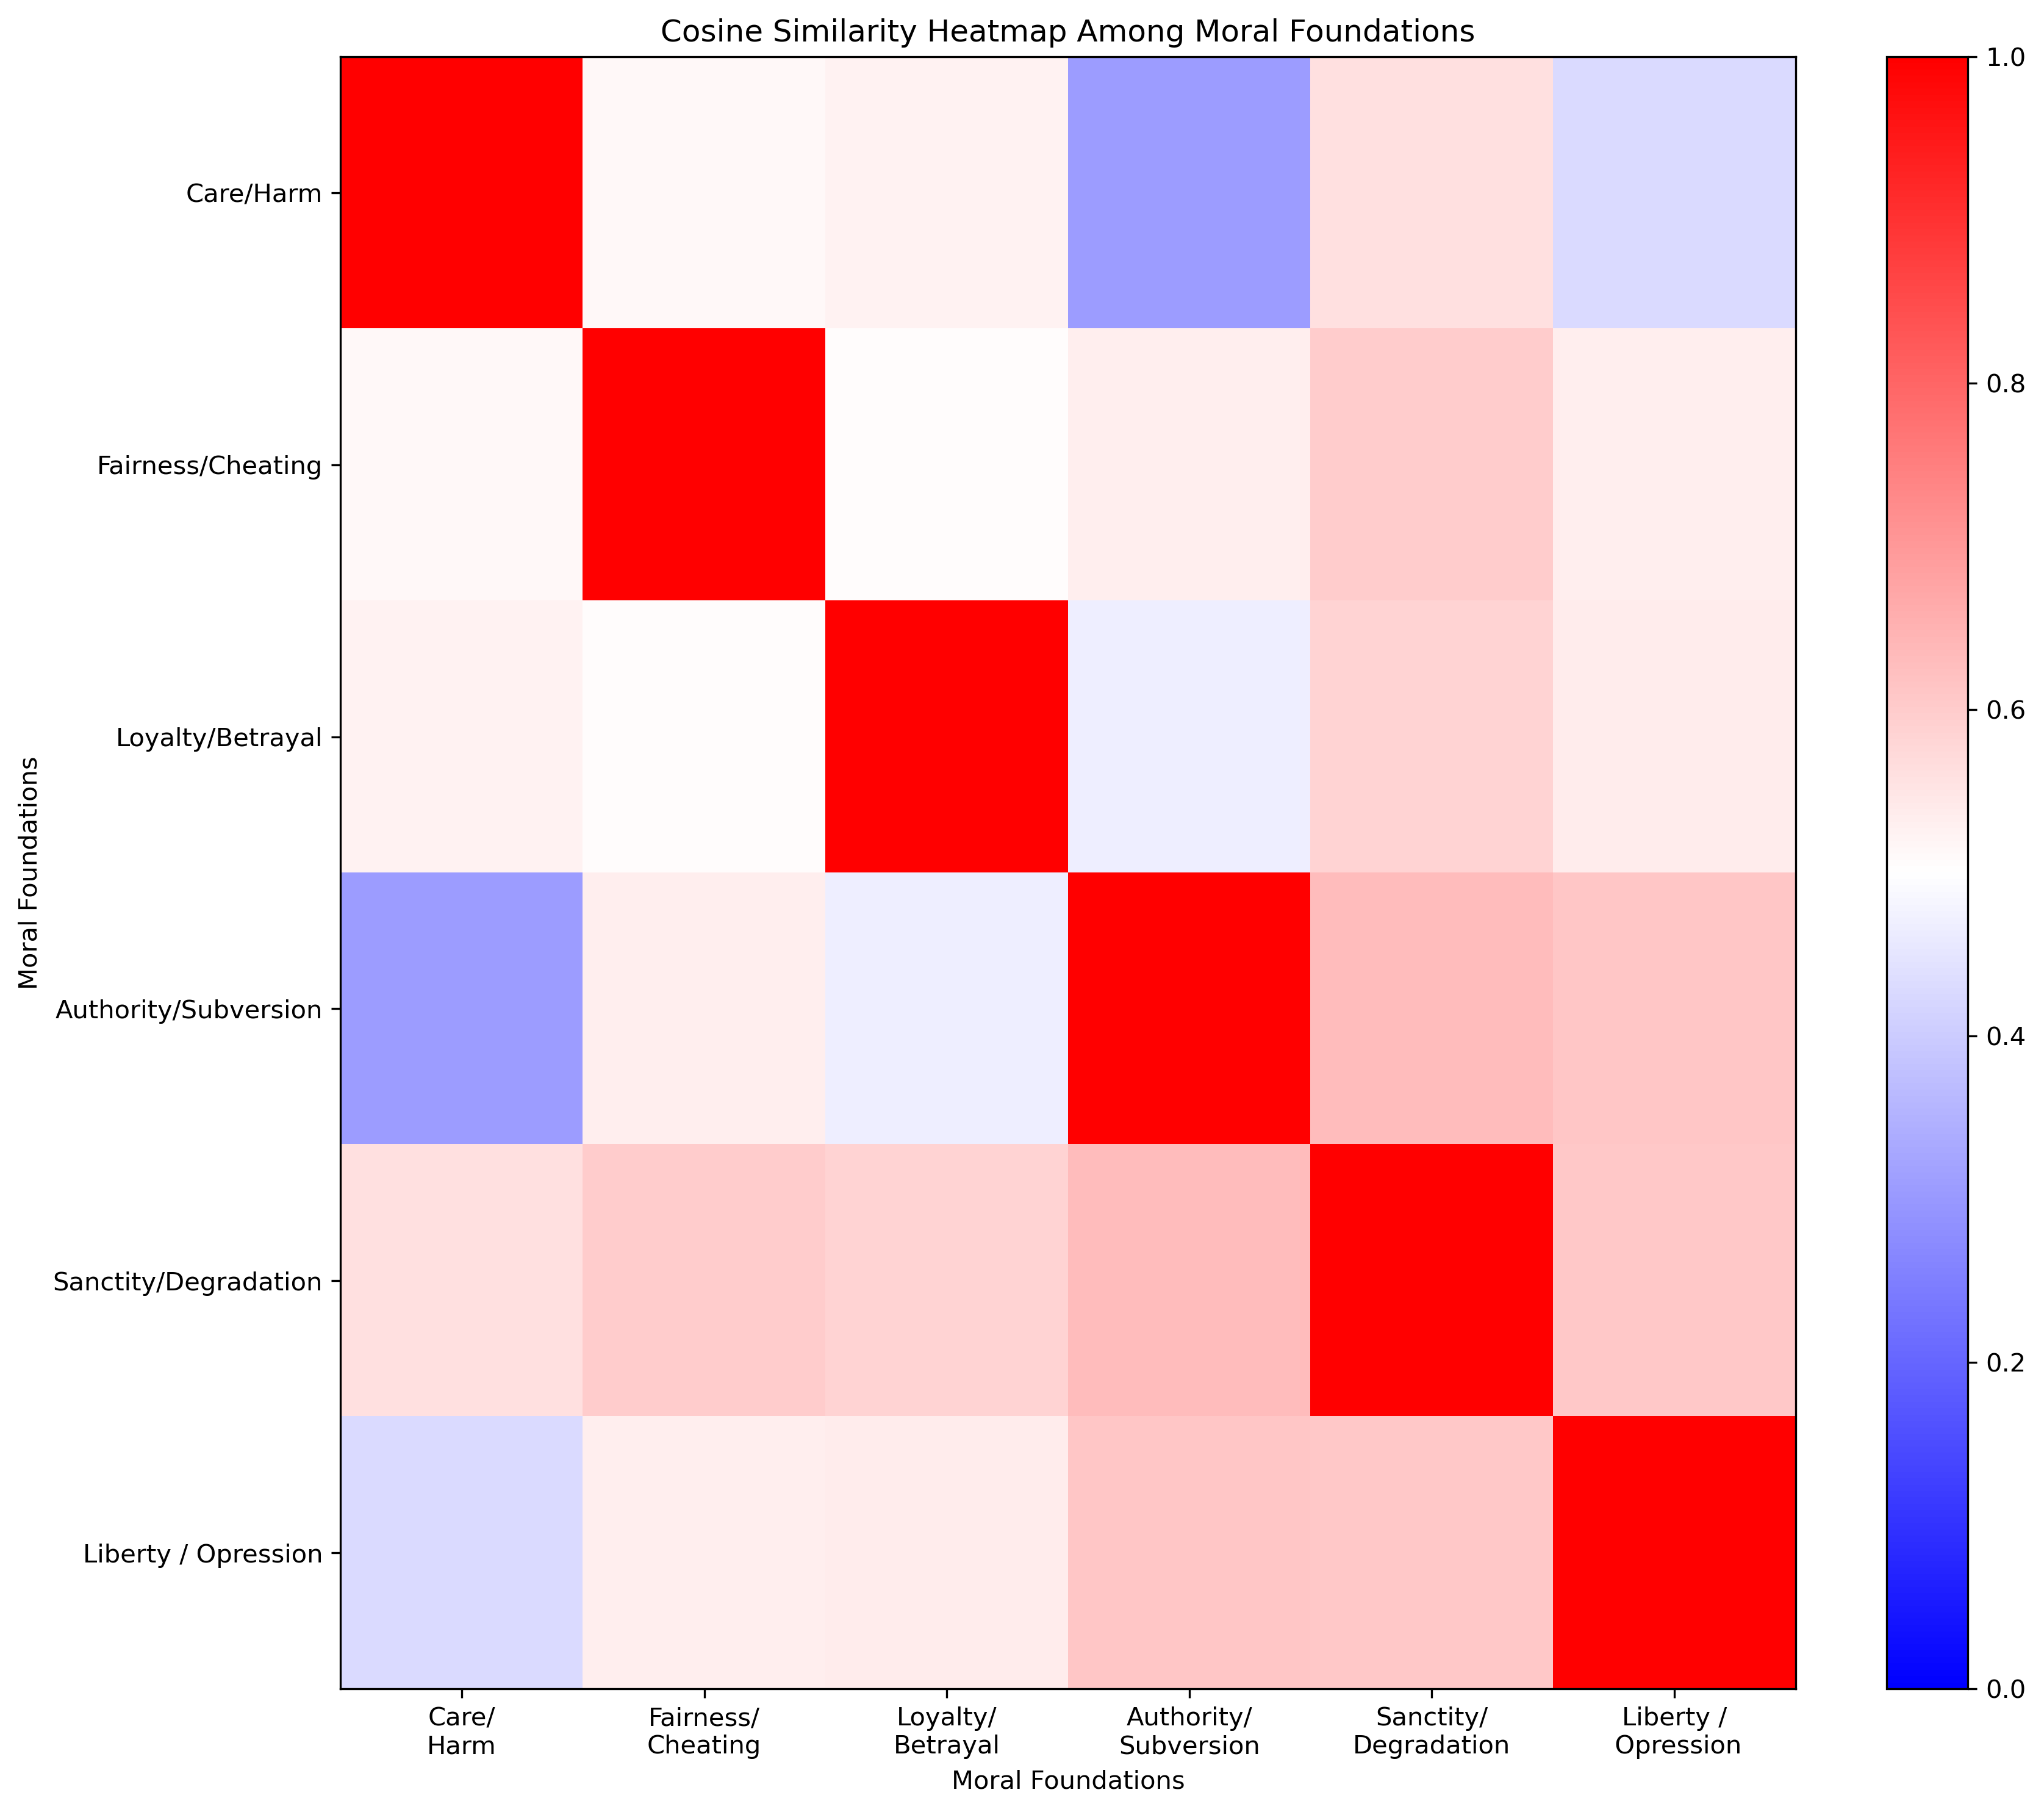

In [15]:
# Filter rows based on 'framework' = 'moral'
moral = df[df['framework'] == 'moral']

# Extract labels for both axes
labels = moral['label'].values
# Insert line breaks at "/" for x-axis labels
x_labels = [label.replace('/', '/\n') for label in labels]

# Identify embedding columns (assumes they begin with 'emb_dim_')
embed_cols = [col for col in df.columns if col.startswith('emb_dim_')]

# Get embeddings for the moral rows
embeddings = moral[embed_cols].values

# Compute the cosine similarity matrix among moral embeddings (square matrix)
cos_sim = cosine_similarity(embeddings, embeddings)

# Create a high resolution figure
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
cax = ax.imshow(cos_sim, aspect='auto', cmap='bwr', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar(cax)

# Set tick labels using the 'label' values
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=0)  # horizontal labels for x-axis
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)

ax.set_xlabel('Moral Foundations')
ax.set_ylabel('Moral Foundations')
ax.set_title('Cosine Similarity Heatmap Among Moral Foundations')

plt.tight_layout()
plt.savefig('cosine_similarity_moral_heatmap.jpg', format='jpg', dpi=300)
plt.show()
